In [ ]:
!pip install fitter -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 64.4 MB/s eta 0:00:00


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import plotly.graph_objects as go
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [ ]:
# Load data
train_df = pd.read_csv('/content/drive/MyDrive/mmm_data/train_data.csv')
train_df.drop(columns=["category"], inplace=True)
# test_df = pd.read_csv('/content/drive/MyDrive/mmm_data/test_data.csv')
seasonal_comp = pd.read_csv('/content/drive/MyDrive/mmm_data/seasonal_components.csv')
seasonal_comp.drop(columns=["day_of_year", "revenue"], inplace=True)

train_df = train_df.merge(seasonal_comp, on="date", how="left")

In [ ]:
transform_variables = ["ad_expense_sms", "ad_expense_newspaper", "ad_expense_radio", "ad_expense_tv", "ad_expense_internet",
                       "demand", "consumer_price_index", "consumer_confidence_index", "producer_price_index", "unit_price",
                       "gross_rating_point_newspaper", "gross_rating_point_sms", "gross_rating_point_radio", "gross_rating_point_internet",
                       "gross_rating_point_tv", "trend", "weekly", "yearly"]

delay_channels = ["ad_expense_sms", "ad_expense_newspaper", "ad_expense_radio", "ad_expense_tv", "ad_expense_internet"]

media_channels = ["ad_expense_sms", "ad_expense_newspaper", "ad_expense_radio", "ad_expense_tv", "ad_expense_internet"]

control_variables = ["demand", "consumer_price_index", "consumer_confidence_index", "producer_price_index", "unit_price", "gross_rating_point_newspaper", "gross_rating_point_sms",
                     "gross_rating_point_radio", "gross_rating_point_internet", "gross_rating_point_tv", "fourier_sin_order_1", "fourier_cos_order_1", "fourier_sin_order_2", "fourier_cos_order_2",
                     "fourier_sin_order_3", "fourier_cos_order_3", "trend", "weekly", "yearly"]

fourier_terms = ["fourier_sin_order_1", "fourier_cos_order_1", "fourier_sin_order_2", "fourier_cos_order_2", "fourier_sin_order_3", "fourier_cos_order_3"]

target = "revenue"

In [ ]:
pymc3_distributions = ["AsymmetricLaplace", "Beta", "Cauchy", "chi", "ExGaussian", "expon", "Flat", "Gamma", "Gumbel", "HalfCauchy", "HalfFlat",
                       "halfnorm", "HalfStudentT", "Interpolated", "invgamma", "Kumaraswamy", "Laplace", "Logistic", "LogitNormal", "lognorm", "Moyal",
                       "norm", "Pareto", "PolyaGamma", "Rice", "skewnorm", "SkewStudentT", "t", "Triangular", "TruncatedNormal", "Uniform",
                       "VonMises", "Wald", "Weibull"]

pymc3_distributions = [x.lower() for x in pymc3_distributions]

fitter_distributions = get_distributions()

def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

common_distributions = Intersection(pymc3_distributions, fitter_distributions)
common_distributions

{'beta',
 'cauchy',
 'chi',
 'expon',
 'gamma',
 'halfcauchy',
 'halfnorm',
 'invgamma',
 'laplace',
 'logistic',
 'lognorm',
 'moyal',
 'norm',
 'pareto',
 'rice',
 'skewnorm',
 't',
 'uniform',
 'vonmises',
 'wald'}

# Distribution fit - Revenue

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi,9.561671e-12,3297.976838,3314.506487,inf,0.131883,3.734815e-28
gamma,1.005995e-11,3268.680891,3285.210540,inf,0.153619,4.296534e-38
beta,1.007842e-11,3268.725522,3290.765054,inf,0.149688,3.508185e-36
expon,1.018320e-11,3265.795504,3276.815271,inf,0.145313,4.105145e-34
halfnorm,1.051310e-11,3326.125969,3337.145735,inf,0.185080,3.184577e-55
skewnorm,1.051392e-11,3328.638650,3345.168300,inf,0.187583,9.987645e-57
halfcauchy,1.076246e-11,3258.283850,3269.303616,inf,0.158496,1.553658e-40
rice,1.149604e-11,3391.555736,3408.085386,inf,0.169249,3.394260e-46
wald,1.159063e-11,3269.720084,3280.739850,inf,0.177862,5.276673e-51
norm,1.160361e-11,3463.702799,3474.722565,inf,0.122738,1.969878e-24


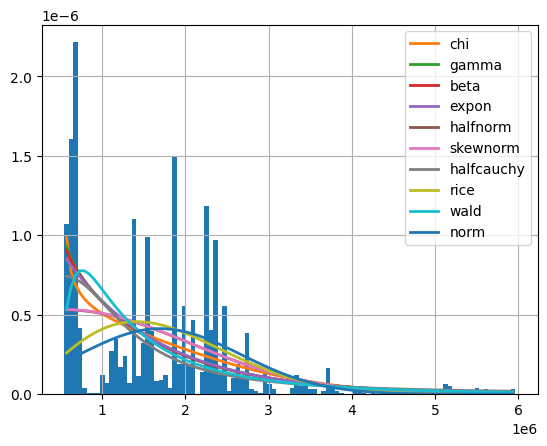

In [ ]:
# ad_expense_sms
revenue_df = train_df[["date"]+[target]].copy()
f = Fitter(revenue_df[target],
          distributions=common_distributions)
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'chi': {'df': 0.7757641133140321,
  'loc': 546769.4399999998,
  'scale': 1710893.8607934332}}

# Distribution fit - Media expenses

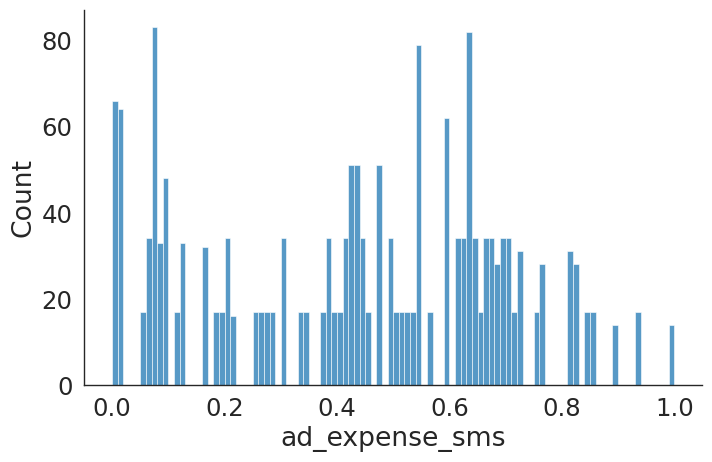

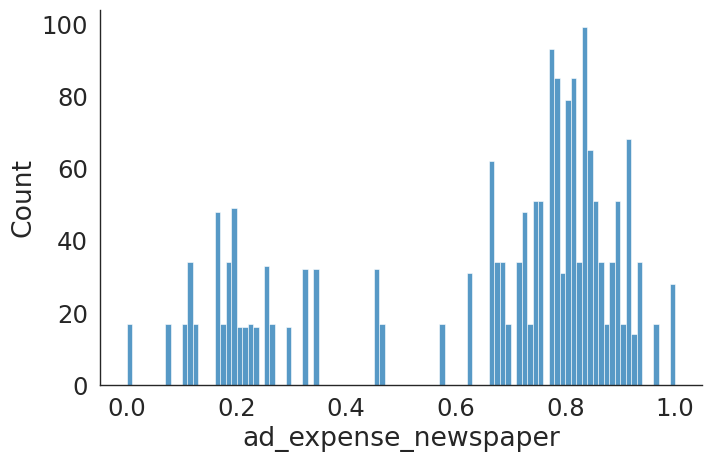

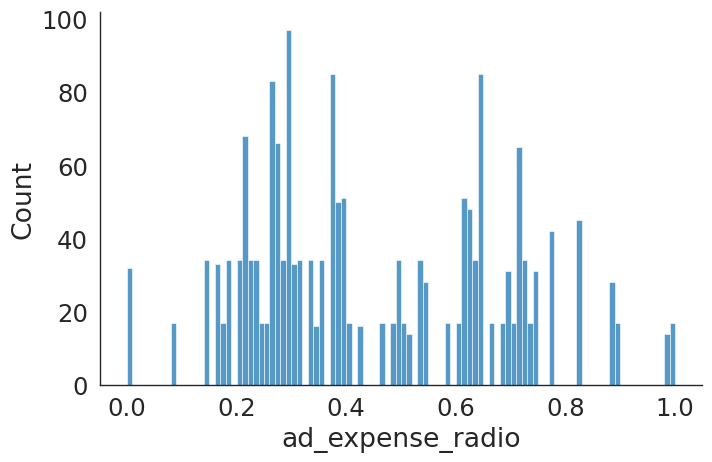

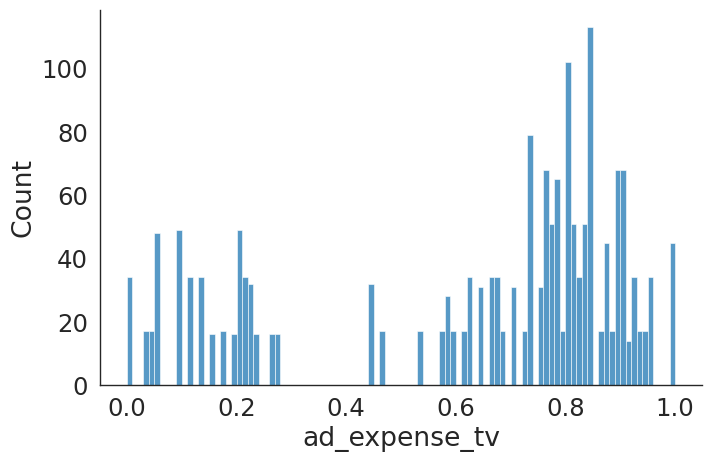

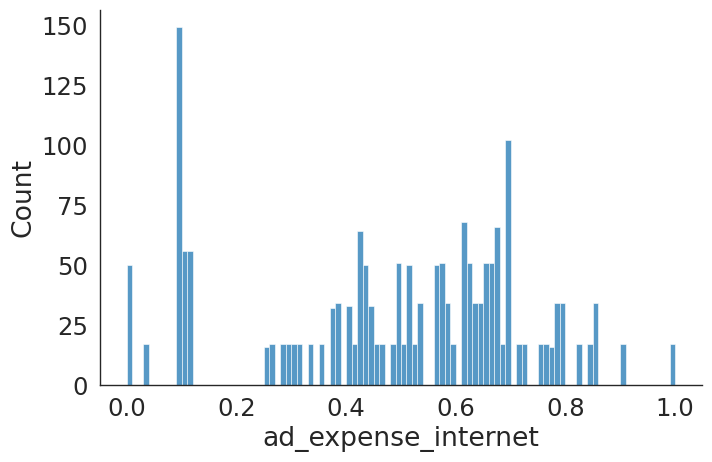

In [ ]:
media_channels_transformed = train_df[["date"]+media_channels].copy()

sns.set_style('white')
sns.set_context("paper", font_scale = 2)

for feature in media_channels:
    scaler = MinMaxScaler()
    original = train_df[feature].values.reshape(-1, 1)
    transformed = scaler.fit_transform(original)
    media_channels_transformed[feature] = transformed
    # numerical_encoder_dict[feature] = scalerdependent_transformation = None
    sns.displot(data=media_channels_transformed, x=feature, kind="hist", bins = 100, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,112.794923,18.711997,40.751530,inf,0.141192,3.194202e-32
skewnorm,116.969447,61.472181,78.001830,inf,0.091812,7.608148e-14
uniform,121.307414,4.000000,15.019766,inf,0.170188,1.044232e-46
norm,122.534530,47.979049,58.998815,inf,0.100028,2.340347e-16
t,122.534549,49.979098,66.508747,inf,0.100028,2.340389e-16
vonmises,122.801763,50.646757,67.176406,inf,0.100723,1.402112e-16
halfnorm,123.044271,42.111946,53.131712,inf,0.181185,6.324591e-53
gamma,123.343234,49.282365,65.812014,inf,0.100976,1.161865e-16
rice,123.529633,42.562405,59.092054,inf,0.106450,1.795939e-18
logistic,124.280160,54.278326,65.298092,inf,0.101513,7.796415e-17


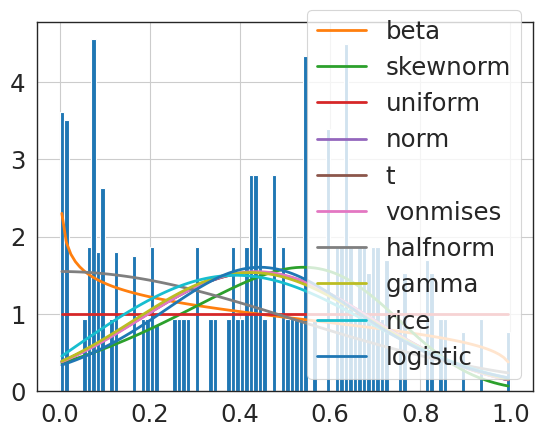

In [ ]:
# ad_expense_sms
f = Fitter(media_channels_transformed["ad_expense_sms"],
          distributions=common_distributions)
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.8408256047321845,
  'b': 1.2087530943363416,
  'loc': -8.0225853856595125e-28,
  'scale': 1.0051921286120011}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,100.028654,211.087523,222.107289,inf,0.183130,4.569312e-54
laplace,121.301713,146.092547,157.112313,inf,0.199879,2.044597e-64
skewnorm,134.914647,60.753507,77.283156,inf,0.184758,4.951996e-55
logistic,162.780049,93.439712,104.459478,inf,0.161228,6.154485e-42
vonmises,173.120744,72.646568,89.176217,inf,0.218322,6.711334e-77
norm,173.673129,68.750094,79.769860,inf,0.222929,3.381779e-80
t,173.673205,70.749586,87.279235,inf,0.222929,3.376839e-80
chi,175.180817,69.525701,86.055350,inf,0.228214,4.540068e-84
uniform,175.274152,4.000000,15.019766,inf,0.363428,1.281939e-216
rice,175.856636,66.918560,83.448209,inf,0.230322,1.219856e-85


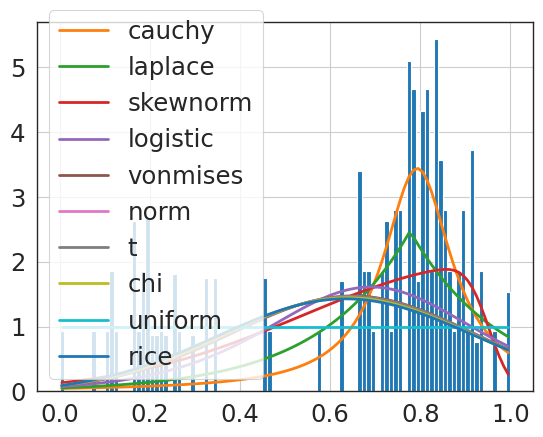

In [ ]:
# ad_expense_newspaper
f = Fitter(media_channels_transformed["ad_expense_newspaper"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'cauchy': {'loc': 0.7931743307619907, 'scale': 0.09262434784418312}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
moyal,127.108501,70.233654,81.253420,inf,0.107498,7.879518e-19
skewnorm,127.200528,66.308093,82.837743,inf,0.117514,1.992177e-22
beta,133.122977,47.319734,69.359266,inf,0.114838,1.958833e-21
gamma,133.355770,61.060969,77.590618,inf,0.115991,7.366850e-22
chi,133.990685,55.096622,71.626271,inf,0.108344,4.029908e-19
invgamma,134.588914,62.968502,79.498151,inf,0.118718,7.002133e-23
rice,134.731973,49.101875,65.631524,inf,0.106100,2.361238e-18
norm,141.794189,58.296334,69.316101,inf,0.139278,2.309289e-31
t,141.794209,60.296342,76.825991,inf,0.139278,2.308800e-31
vonmises,142.069593,60.993029,77.522678,inf,0.138488,5.184339e-31


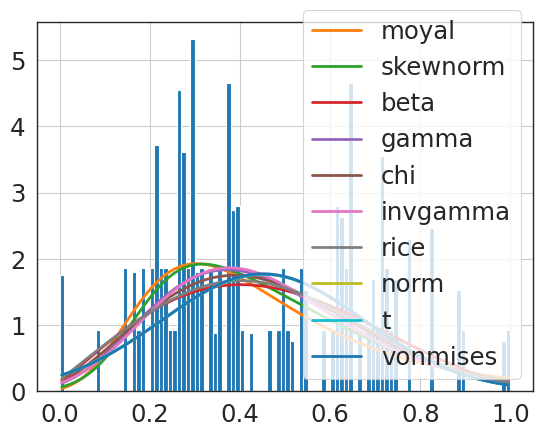

In [ ]:
# ad_expense_radio
f = Fitter(media_channels_transformed["ad_expense_radio"],
           distributions=common_distributions)
            # distributions=['gamma',
            #               't',
            #               "beta",
            #               "burr",
            #               "norm"])
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'moyal': {'loc': 0.303531217141519, 'scale': 0.12538936616089047}}

In [ ]:
f_ = Fitter(media_channels_transformed["ad_expense_radio"],
          #  distributions=common_distributions)
            distributions=["beta"])
f_.fit()
f_.get_best()

{'beta': {'a': 2.4935217859104513,
  'b': 3.5276719824240104,
  'loc': -0.04346472507839998,
  'scale': 1.1990618676489637}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,124.606919,188.142813,199.162579,inf,0.174234,5.988343e-49
laplace,139.210451,126.307967,137.327733,inf,0.185800,1.182535e-55
skewnorm,143.028713,50.839713,67.369362,inf,0.167447,3.206986e-45
logistic,167.763164,79.424478,90.444244,inf,0.155712,3.933629e-39
uniform,168.592042,4.000000,15.019766,inf,0.305779,4.866968e-152
vonmises,175.613076,61.786900,78.316549,inf,0.200751,5.569199e-65
norm,176.104666,57.847962,68.867729,inf,0.204675,1.494133e-67
t,176.104690,59.847928,76.377578,inf,0.204675,1.493793e-67
chi,177.681462,58.662645,75.192294,inf,0.210115,3.335382e-71
rice,178.553042,54.897867,71.427516,inf,0.209914,4.572038e-71


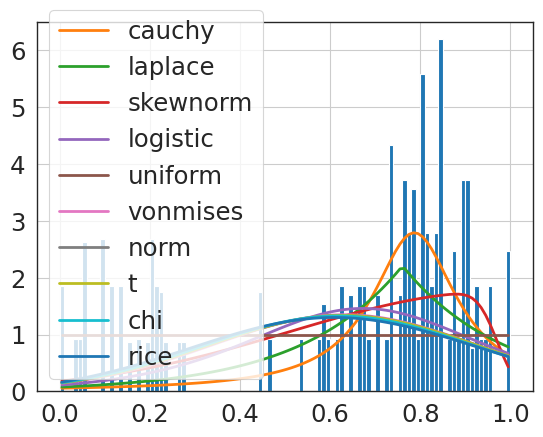

In [ ]:
# ad_expense_tv
f = Fitter(media_channels_transformed["ad_expense_tv"],
           distributions=common_distributions)
            # distributions=['gamma',
            #               't',
            #               "beta",
            #               "burr",
            #               "norm"])
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'cauchy': {'loc': 0.7865942444718943, 'scale': 0.11405131809582562}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewnorm,160.263806,68.663054,85.192704,inf,0.104088,1.115512e-17
beta,168.357346,40.681353,62.720886,inf,0.113287,7.191081e-21
logistic,169.471430,57.718527,68.738293,inf,0.124103,5.704189e-25
cauchy,171.039992,111.171096,122.190862,inf,0.121972,3.926849e-24
vonmises,171.225387,50.593565,67.123215,inf,0.122291,2.948661e-24
t,171.300206,49.833315,66.362964,inf,0.121849,4.385479e-24
norm,171.300231,47.833240,58.853006,inf,0.121848,4.386726e-24
chi,171.898588,49.152535,65.682184,inf,0.121851,4.375744e-24
gamma,173.314224,48.341886,64.871535,inf,0.121114,8.458203e-24
rice,173.334302,44.094628,60.624277,inf,0.126464,6.467354e-26


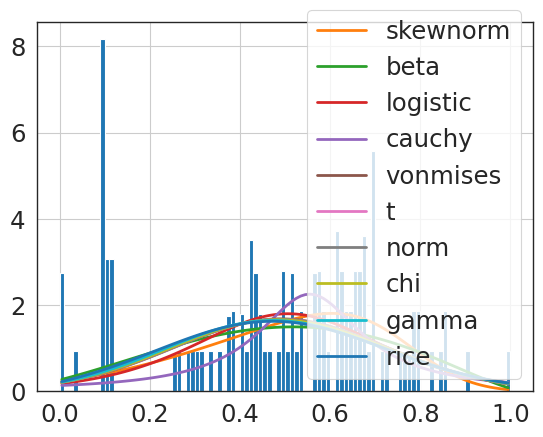

In [ ]:
# ad_expense_internet
f = Fitter(media_channels_transformed["ad_expense_internet"],
           distributions=common_distributions)
            # distributions=['gamma',
            #               't',
            #               "beta",
            #               "burr",
            #               "norm"])
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'skewnorm': {'a': -3.3132002550206683,
  'loc': 0.7735470914506841,
  'scale': 0.3712846296307375}}

In [ ]:
f_ = Fitter(media_channels_transformed["ad_expense_internet"],
          #  distributions=common_distributions)
            distributions=["beta"])
f_.fit()
f_.get_best()

{'beta': {'a': 3.0837890451815753,
  'b': 2.5261054721967344,
  'loc': -0.18505718744090421,
  'scale': 1.2192670342714726}}

# Distribution fit - Control Variables

### Check distributions of fourier components

In [ ]:
fourier_terms

['fourier_sin_order_1',
 'fourier_cos_order_1',
 'fourier_sin_order_2',
 'fourier_cos_order_2',
 'fourier_sin_order_3',
 'fourier_cos_order_3']

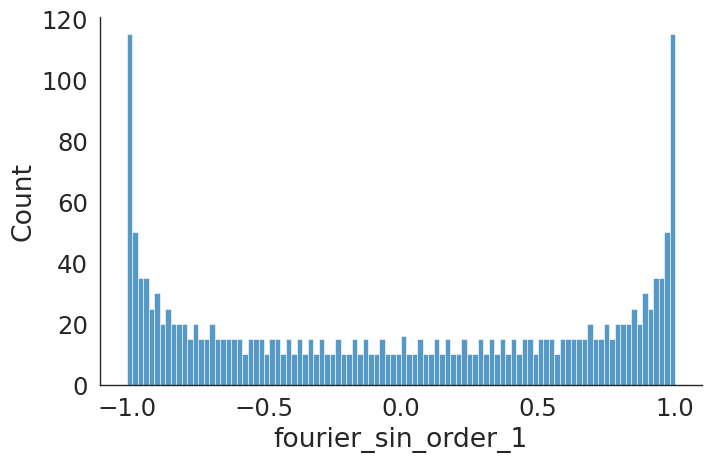

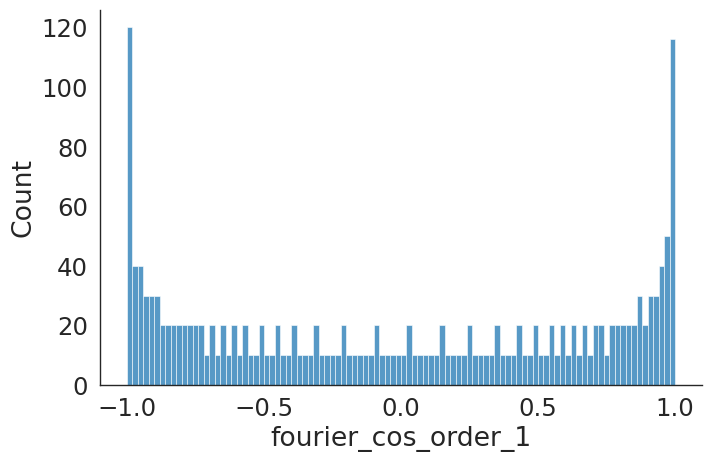

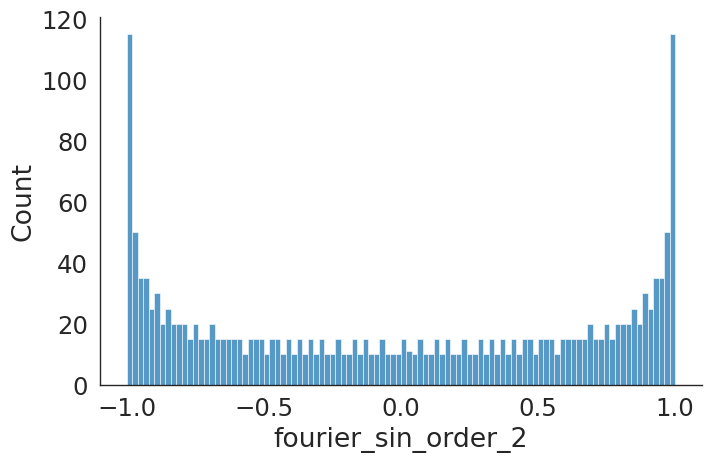

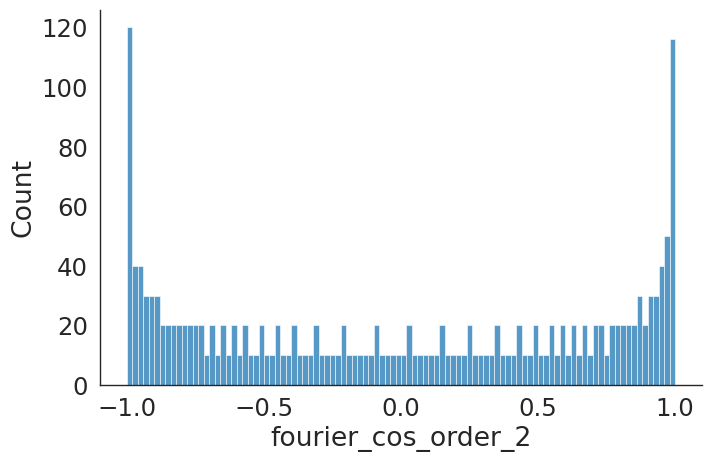

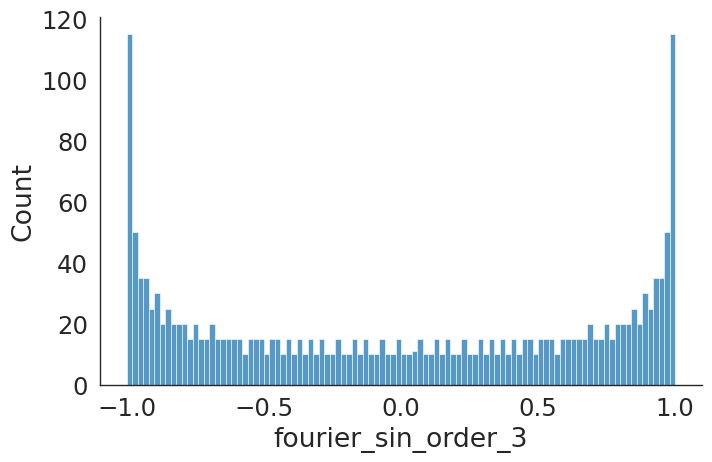

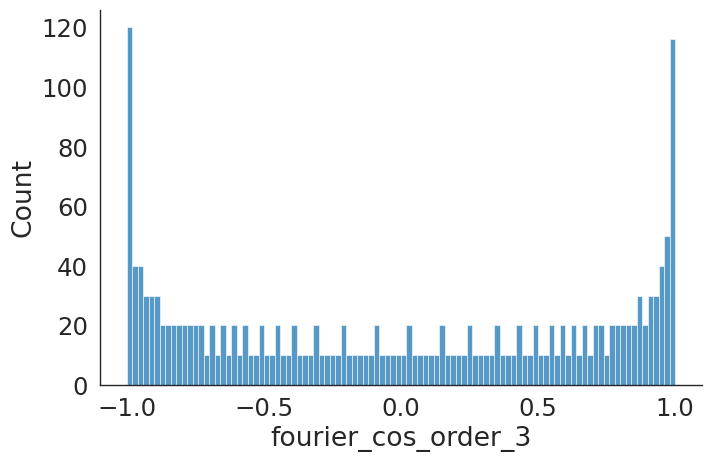

In [ ]:
fourier_df = train_df[["date"]+fourier_terms].copy()

sns.set_style('white')
sns.set_context("paper", font_scale = 2)

for feature in fourier_terms:
    sns.displot(data=fourier_df, x=feature, kind="hist", bins = 100, aspect = 1.5)

In [ ]:
fourier_terms

['fourier_sin_order_1',
 'fourier_cos_order_1',
 'fourier_sin_order_2',
 'fourier_cos_order_2',
 'fourier_sin_order_3',
 'fourier_cos_order_3']

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.123703,175.972847,198.012379,0.016498,0.010658,9.842632e-01
chi,17.673168,196.777912,213.307561,0.198850,0.128166,1.311507e-26
uniform,18.679993,142.627584,153.647350,0.154185,0.106507,1.717534e-18
pareto,21.667903,205.998150,222.527799,0.252532,0.136590,3.551175e-30
expon,21.667903,203.998148,215.017914,0.252532,0.136590,3.551170e-30
halfnorm,22.274137,178.587296,189.607062,0.232522,0.117296,2.404087e-22
halfcauchy,23.006337,236.508329,247.528095,0.285970,0.238617,5.711529e-92
wald,25.218797,218.549802,229.569569,0.305812,0.150974,8.417172e-37
rice,25.743005,180.426489,196.956138,0.277810,0.104270,9.708742e-18
moyal,26.203781,196.079452,207.099218,0.299105,0.121624,5.361627e-24


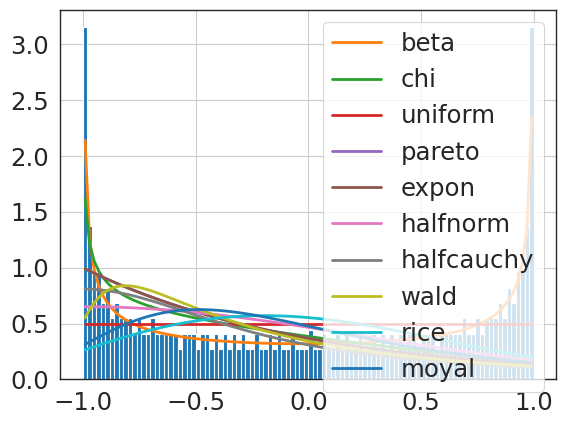

In [ ]:
# fourier_sin_order_1
f = Fitter(fourier_df["fourier_sin_order_1"],
           distributions=common_distributions)
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.5102993778587328,
  'b': 0.4947088939672765,
  'loc': -1.0001022350250368,
  'scale': 2.0000929747612273}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,6.433637,170.031713,192.071245,0.057086,0.054539,3.672729e-05
chi,18.958434,197.638176,214.167825,0.223341,0.133907,5.146397e-29
uniform,20.104989,142.625732,153.645498,0.179636,0.108420,3.793034e-19
expon,23.133108,203.996324,215.016090,0.276389,0.138307,6.239963e-31
pareto,23.133108,205.996327,222.525976,0.276389,0.138307,6.239938e-31
halfnorm,23.714226,178.595571,189.615337,0.257428,0.118983,5.553528e-23
halfcauchy,24.460336,236.500716,247.520482,0.309834,0.238724,4.722222e-92
wald,26.654416,218.550459,229.570225,0.329766,0.151101,7.304713e-37
rice,27.156305,180.452785,196.982434,0.303815,0.105709,3.200973e-18
moyal,27.611530,196.092196,207.111962,0.324690,0.123293,1.192481e-24


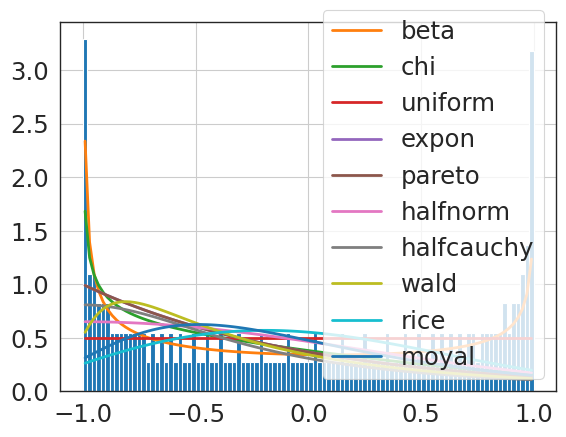

In [ ]:
f = Fitter(fourier_df["fourier_cos_order_1"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.5258748936289821,
  'b': 0.6101298332133581,
  'loc': -0.9999629591162658,
  'scale': 2.006318081465192}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.227018,174.996981,197.036513,0.016770,0.004944,1.000000e+00
chi,17.665976,196.777912,213.307561,0.198594,0.128166,1.311507e-26
uniform,18.672495,142.627584,153.647350,0.153877,0.106507,1.717534e-18
pareto,21.660747,205.998150,222.527799,0.252287,0.136587,3.563483e-30
expon,21.660747,203.998148,215.017914,0.252287,0.136587,3.563477e-30
halfnorm,22.266982,178.587296,189.607062,0.232217,0.117296,2.404087e-22
halfcauchy,22.999245,236.508329,247.528095,0.285742,0.238617,5.711529e-92
wald,25.211736,218.549802,229.569569,0.305576,0.150974,8.417172e-37
rice,25.735685,180.426409,196.956058,0.277426,0.104274,9.679763e-18
moyal,26.197393,196.076017,207.095783,0.298784,0.121616,5.402002e-24


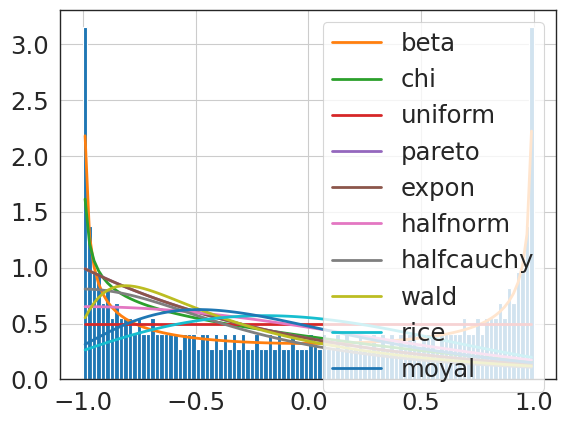

In [ ]:
# fourier_sin_order_2
f = Fitter(fourier_df["fourier_sin_order_2"],
           distributions=common_distributions)
f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.5098041788130172,
  'b': 0.5073074488151494,
  'loc': -1.000113653820457,
  'scale': 2.0001043935566476}}

In [ ]:
# fourier_cos_order_2
f = Fitter(fourier_df["fourier_cos_order_2"],
           distributions=common_distributions)
f.fit()
f.get_best()

{'beta': {'a': 0.5258738247369126,
  'b': 0.6101279275846001,
  'loc': -0.9999629591162658,
  'scale': 2.006318081465192}}

In [ ]:
# fourier_sin_order_3
f = Fitter(fourier_df["fourier_sin_order_3"],
           distributions=common_distributions)
f.fit()
f.get_best()

{'beta': {'a': 0.5126700220713022,
  'b': 0.49834618195920455,
  'loc': -1.0001435310369389,
  'scale': 2.0001342707731293}}

In [ ]:
# fourier_cos_order_3
f = Fitter(fourier_df["fourier_cos_order_3"],
           distributions=common_distributions)
f.fit()
f.get_best()

{'beta': {'a': 0.5258720545235704,
  'b': 0.6101247674699319,
  'loc': -0.9999629591162658,
  'scale': 2.006318081465192}}

# Check distributions of remaining control variables

In [ ]:
other_contr_var = [x for x in control_variables if x not in fourier_terms]
other_contr_var

['demand',
 'consumer_price_index',
 'consumer_confidence_index',
 'producer_price_index',
 'unit_price',
 'gross_rating_point_newspaper',
 'gross_rating_point_sms',
 'gross_rating_point_radio',
 'gross_rating_point_internet',
 'gross_rating_point_tv',
 'trend',
 'weekly',
 'yearly']

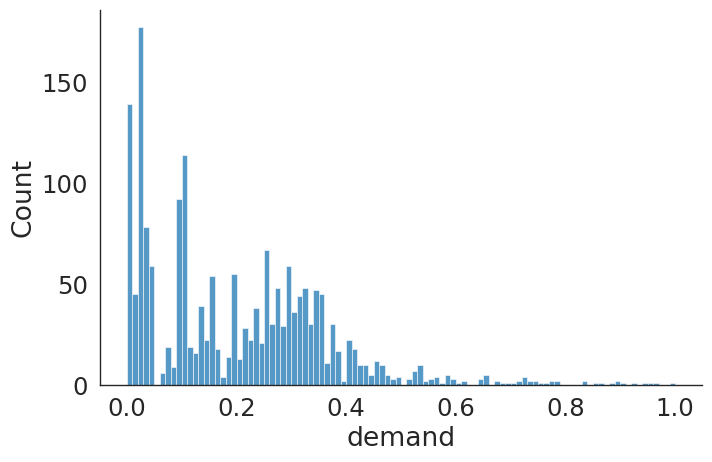

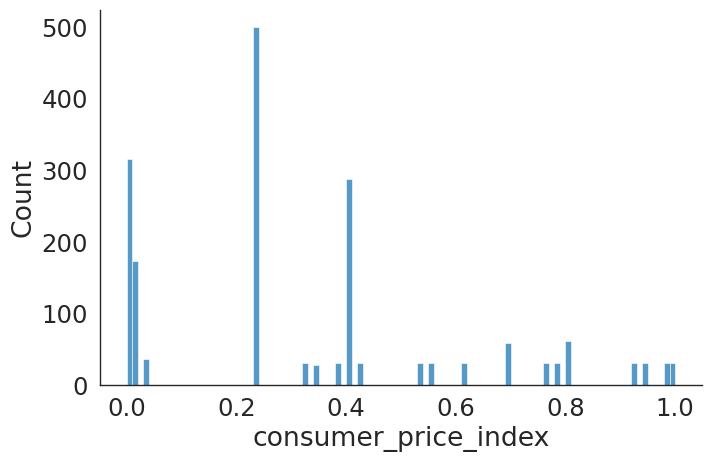

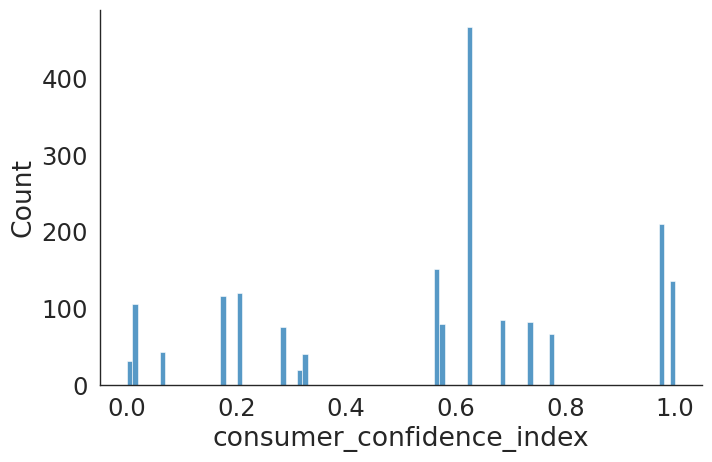

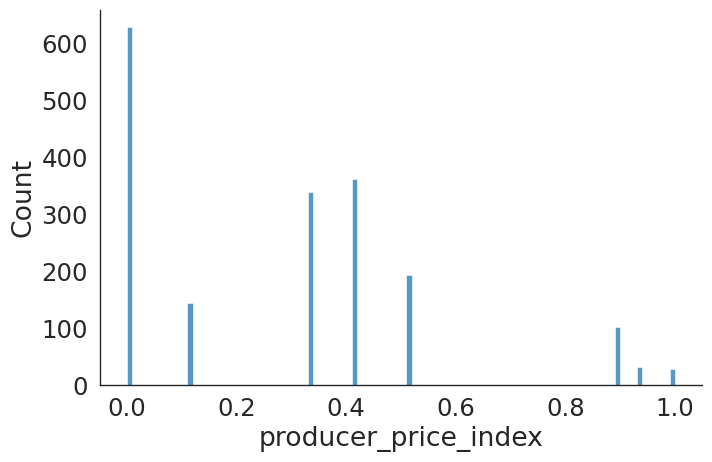

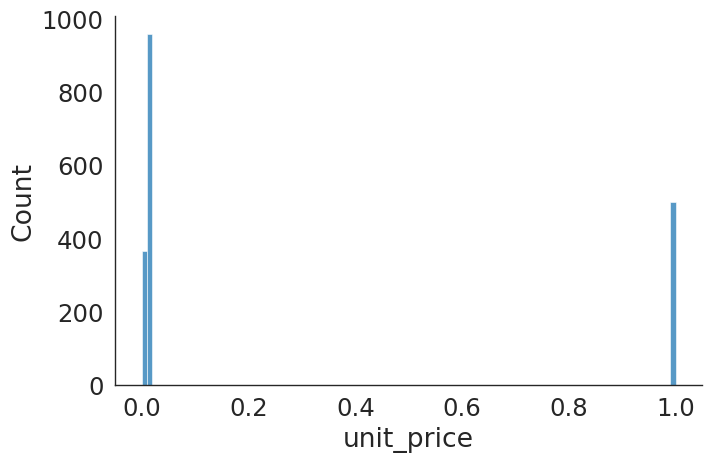

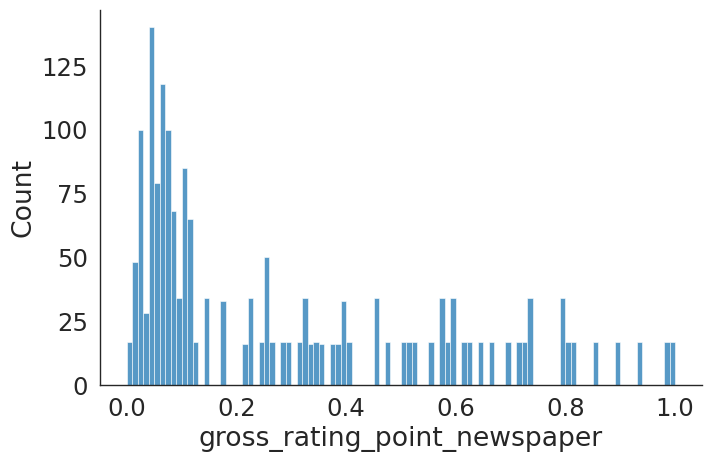

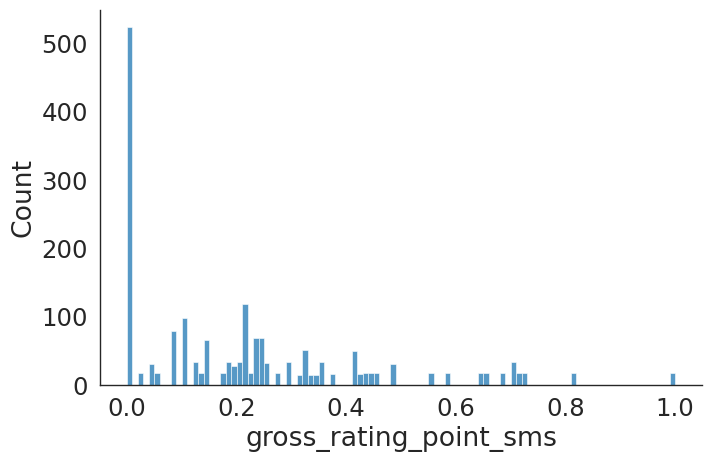

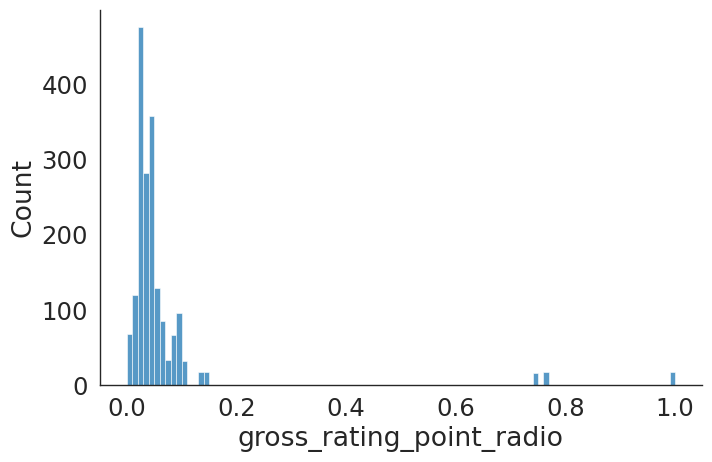

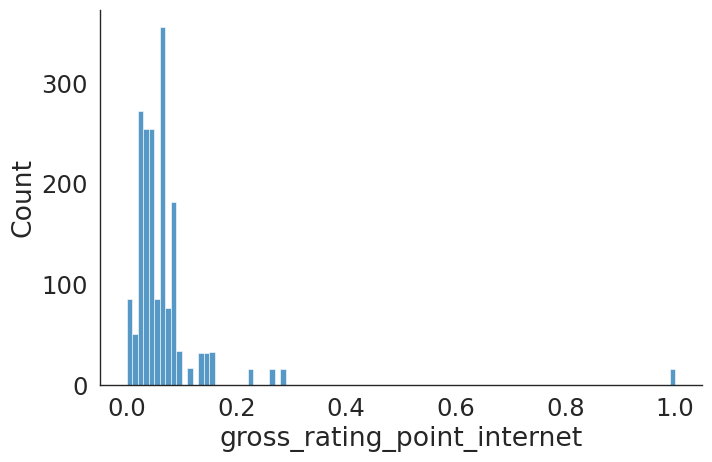

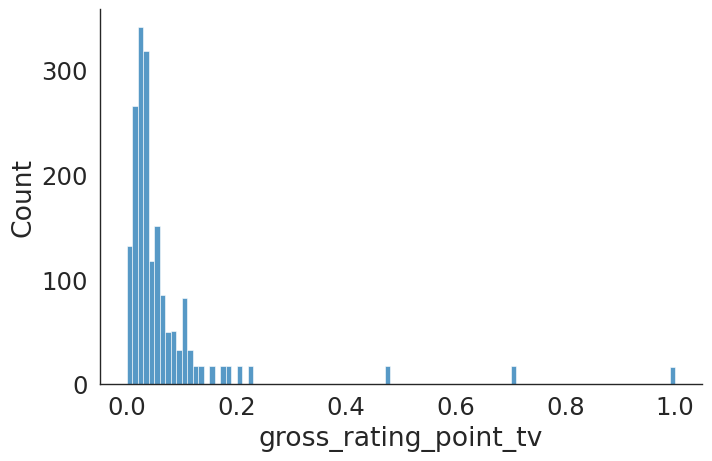

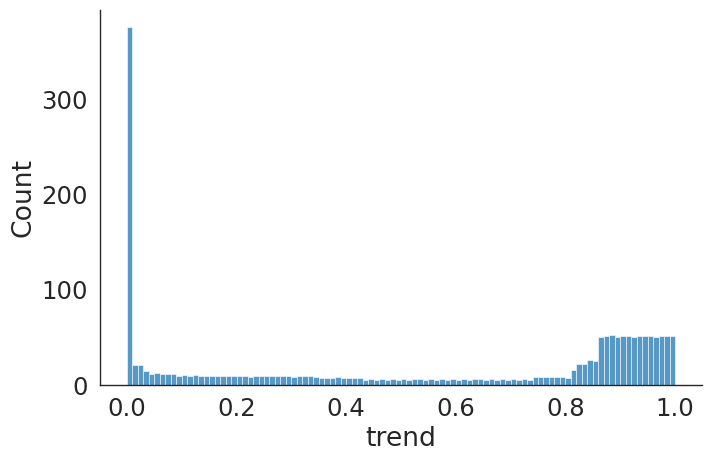

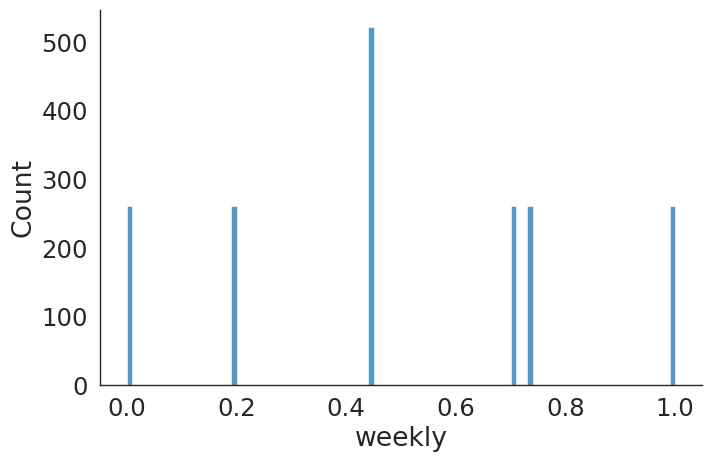

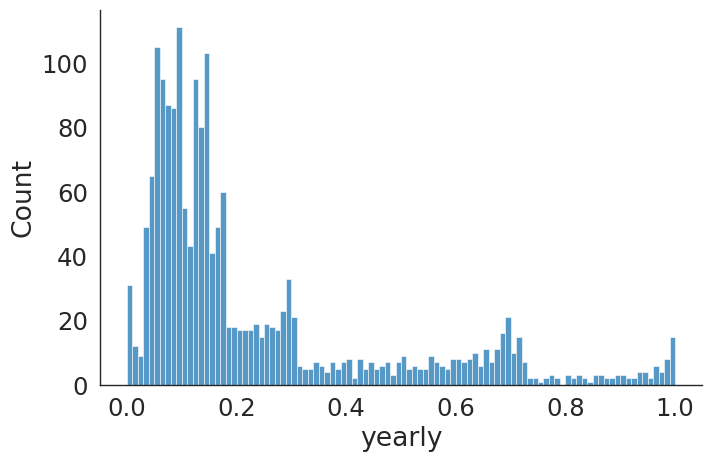

In [ ]:
control_var_transformed = train_df[["date"]+other_contr_var].copy()

sns.set_style('white')
sns.set_context("paper", font_scale = 2)

for feature in other_contr_var:
    scaler = MinMaxScaler()
    original = train_df[feature].values.reshape(-1, 1)
    transformed = scaler.fit_transform(original)
    control_var_transformed[feature] = transformed
    # numerical_encoder_dict[feature] = scalerdependent_transformation = None
    sns.displot(data=control_var_transformed, x=feature, kind="hist", bins = 100, aspect = 1.5)

In [ ]:
other_contr_var

['demand',
 'consumer_price_index',
 'consumer_confidence_index',
 'producer_price_index',
 'unit_price',
 'gross_rating_point_newspaper',
 'gross_rating_point_sms',
 'gross_rating_point_radio',
 'gross_rating_point_internet',
 'gross_rating_point_tv',
 'trend',
 'weekly',
 'yearly']

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi,124.654092,246.103438,262.633087,inf,0.092012,6.651380e-14
beta,131.974393,179.980189,202.019721,inf,0.116420,5.104973e-22
gamma,133.665310,180.485733,197.015382,inf,0.116439,5.024470e-22
pareto,137.101497,182.234898,198.764548,inf,0.112770,1.104930e-20
expon,137.101498,180.234896,191.254662,inf,0.112770,1.104938e-20
halfnorm,147.335835,266.976543,277.996309,inf,0.135446,1.118131e-29
skewnorm,147.335932,268.966184,285.495833,inf,0.135448,1.116146e-29
halfcauchy,149.528310,174.658858,185.678624,inf,0.128873,6.716619e-27
wald,166.233001,176.587798,187.607564,inf,0.131495,5.438732e-28
lognorm,173.402295,186.455421,202.985070,inf,0.119664,3.053120e-23


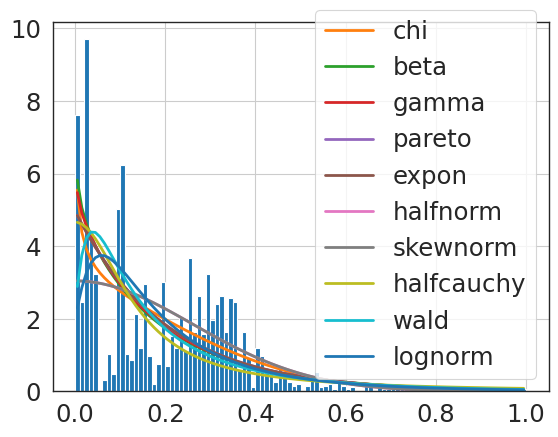

In [ ]:
# demand
f = Fitter(control_var_transformed["demand"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'chi': {'df': 0.7865239899895868,
  'loc': -2.0825827229420947e-31,
  'scale': 0.2889469679039091}}

In [ ]:
f_ = Fitter(control_var_transformed["demand"],
           distributions=["beta"])

f_.fit()
f_.get_best()

{'beta': {'a': 0.9138400800371671,
  'b': 6660168.804604142,
  'loc': -3.1828235735590696e-31,
  'scale': 1464595.8940392246}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1073.123075,193.944722,215.984254,inf,0.444375,0.000000e+00
gamma,1110.842226,191.309086,207.838736,inf,0.448568,0.000000e+00
pareto,1120.785147,367.361900,383.891549,inf,0.405378,1.296768e-271
chi,1136.409095,134.900040,151.429689,inf,0.347104,4.549722e-197
expon,1289.385958,87.815543,98.835310,inf,0.224335,3.222207e-81
halfcauchy,1306.246368,121.698686,132.718452,inf,0.214545,2.996159e-74
skewnorm,1308.387595,62.344754,78.874403,inf,0.231644,1.238587e-86
halfnorm,1308.389371,60.324321,71.344087,inf,0.231649,1.228678e-86
laplace,1321.137796,133.478841,144.498607,inf,0.213034,3.336044e-73
wald,1321.640244,111.695731,122.715497,inf,0.267424,8.600790e-116


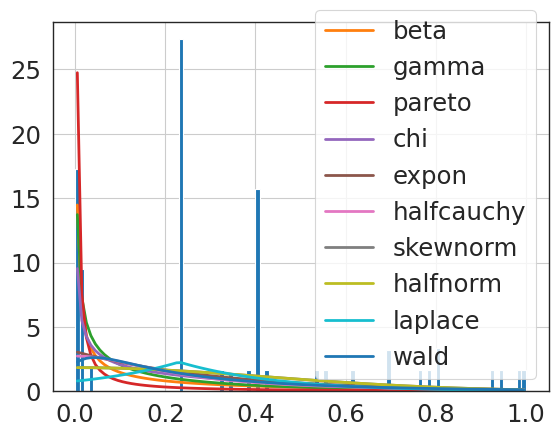

In [ ]:
# consumer_price_index
f = Fitter(control_var_transformed["consumer_price_index"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.2616207849000346,
  'b': 2.5127971751660088,
  'loc': -4.516612566481483e-31,
  'scale': 2.128697164335928}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,1010.953747,81.009055,92.028821,inf,0.182913,6.131444e-54
cauchy,1012.869440,122.405318,133.425084,inf,0.172684,4.390258e-48
beta,1020.528205,42.968928,65.008460,inf,0.247518,5.047521e-99
uniform,1029.378612,4.000000,15.019766,inf,0.267213,1.316224e-115
skewnorm,1036.050187,47.484656,64.014305,inf,0.157157,7.402333e-40
logistic,1037.207193,54.280213,65.299979,inf,0.187061,2.065554e-56
norm,1038.735445,43.735417,54.755183,inf,0.208599,3.554048e-70
t,1038.735567,45.735164,62.264813,inf,0.208602,3.540299e-70
vonmises,1038.736728,46.762867,63.292516,inf,0.206834,5.457076e-69
chi,1039.409968,45.359880,61.889529,inf,0.215377,7.891996e-75


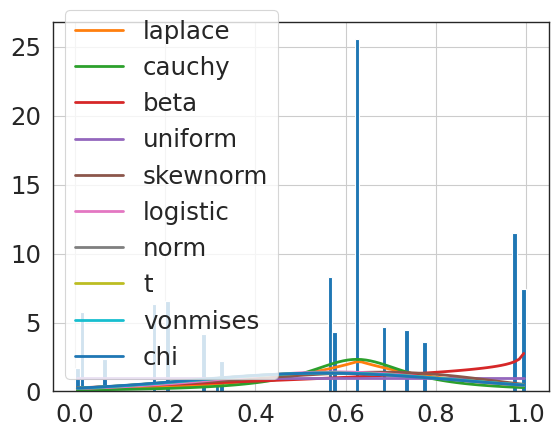

In [ ]:
# consumer_confidence_index
f = Fitter(control_var_transformed["consumer_confidence_index"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'laplace': {'loc': 0.6293103448275854, 'scale': 0.2273624277674962}}

In [ ]:
f_ = Fitter(control_var_transformed["consumer_confidence_index"],
           distributions=["beta"])

f_.fit()
f_.get_best()

{'beta': {'a': 1.936622756635269,
  'b': 0.8592559155992876,
  'loc': -0.21593318016677382,
  'scale': 1.215933180166774}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1420.003121,195.465426,217.504958,inf,0.392517,5.189212e-254
gamma,1475.480531,278.377794,294.907443,inf,0.474774,0.000000e+00
chi,1501.305369,151.182427,167.712076,inf,0.346291,4.025625e-196
pareto,1774.303781,192.492519,209.022168,inf,0.343921,2.247047e-193
expon,1944.813381,101.265433,112.285199,inf,0.343921,2.247047e-193
halfcauchy,1964.942456,136.722266,147.742032,inf,0.343921,2.247081e-193
wald,1975.632665,132.749928,143.769695,inf,0.306676,5.976282e-153
skewnorm,1984.570574,76.517524,93.047173,inf,0.343921,2.247047e-193
halfnorm,1984.572915,74.475740,85.495506,inf,0.343921,2.247209e-193
rice,2016.054425,91.564865,108.094514,inf,0.245914,9.863725e-98


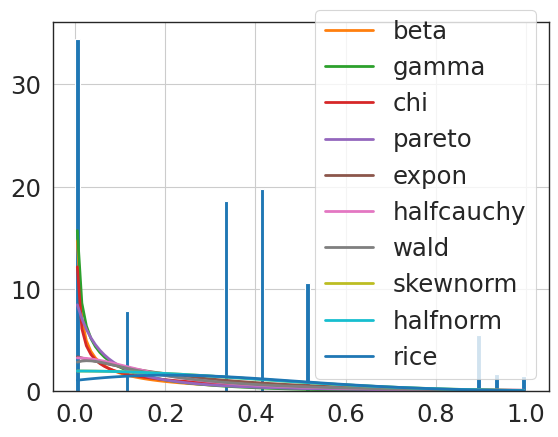

In [ ]:
# producer_price_index
f = Fitter(control_var_transformed["producer_price_index"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'beta': {'a': 0.34249517627631176,
  'b': 5.517180402597212,
  'loc': -1.0148544217576871e-32,
  'scale': 3.155817707079009}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfcauchy,2186.594200,515.623061,526.642827,inf,0.265064,9.868749e-114
gamma,2852.826780,332.214698,348.744347,inf,0.457064,0.000000e+00
chi,3039.907817,172.248926,188.778575,inf,0.381144,5.373520e-239
t,3338.409355,1138.658193,1155.187842,inf,0.376170,1.366898e-232
wald,3439.688232,222.034445,233.054212,inf,0.542699,0.000000e+00
expon,3595.289870,105.254592,116.274358,inf,0.672704,0.000000e+00
pareto,3595.289870,107.254600,123.784249,inf,0.672704,0.000000e+00
laplace,3701.671718,237.995424,249.015190,inf,0.472689,0.000000e+00
moyal,3750.255008,137.006085,148.025851,inf,0.477194,0.000000e+00
halfnorm,3788.592313,41.310277,52.330043,inf,0.702251,0.000000e+00


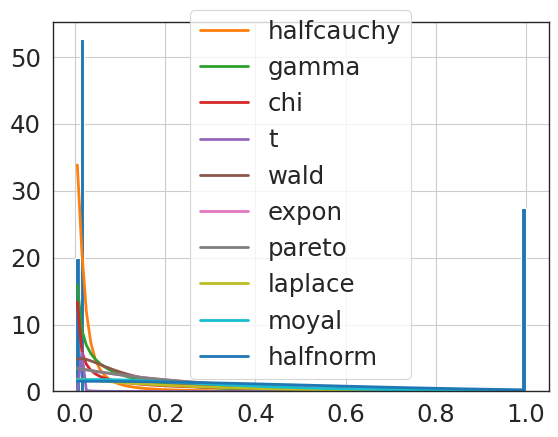

In [ ]:
# unit_price
f = Fitter(control_var_transformed["unit_price"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'halfcauchy': {'loc': -2.0680907417542268e-10, 'scale': 0.017383550665209198}}

In [ ]:
f_ = Fitter(control_var_transformed["unit_price"],
           distributions=["gamma"])

f_.fit()
f_.get_best()

{'gamma': {'a': 0.5448910376046314,
  'loc': -3.727101410774727e-29,
  'scale': 0.20284630014771776}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,99.527921,162.673373,179.203023,inf,0.113265,7.327741e-21
wald,113.956451,133.919175,144.938941,inf,0.115075,1.603954e-21
halfcauchy,114.399193,155.472486,166.492252,inf,0.101724,6.658900e-17
pareto,126.889368,105.159109,121.688758,inf,0.147848,2.644949e-35
expon,126.889369,103.159105,114.178871,inf,0.147848,2.644904e-35
gamma,128.070144,118.366031,134.895680,inf,0.107880,5.824440e-19
cauchy,151.151559,252.989470,264.009236,inf,0.263409,2.675870e-112
chi,152.198651,78.283758,94.813407,inf,0.154838,1.072464e-38
beta,152.358538,48.403970,70.443502,inf,0.182234,1.538591e-53
skewnorm,157.868732,77.657500,94.187149,inf,0.257307,4.256164e-107


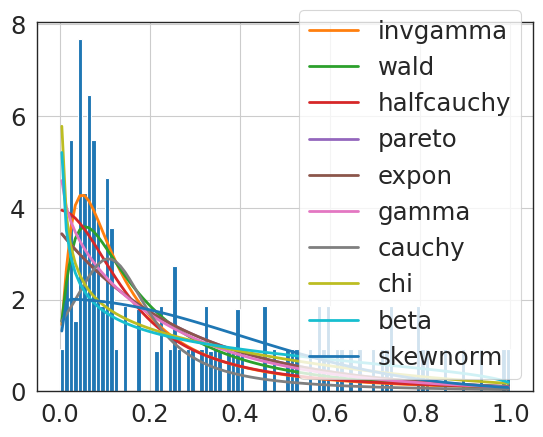

In [ ]:
# gross_rating_point_newspaper
f = Fitter(control_var_transformed["gross_rating_point_newspaper"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'invgamma': {'a': 1.3779540901295753,
  'loc': -0.030239911680691726,
  'scale': 0.19094537247801452}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi,358.055860,343.000723,359.530372,inf,0.365925,1.066502e-219
gamma,502.955735,314.342909,330.872558,inf,0.293522,6.940436e-140
beta,507.433561,301.351168,323.390701,inf,0.286418,4.351027e-133
pareto,752.947029,168.351353,184.881003,inf,0.286418,4.351027e-133
expon,760.358356,164.615476,175.635242,inf,0.286418,4.351027e-133
halfcauchy,776.955167,178.609185,189.628951,inf,0.286418,4.351171e-133
wald,796.616069,180.116146,191.135912,inf,0.208347,5.256948e-70
invgamma,804.455197,189.090272,205.619921,inf,0.202277,5.646239e-66
skewnorm,812.936546,171.113254,187.642903,inf,0.286418,4.351027e-133
halfnorm,812.937208,169.107404,180.127171,inf,0.286418,4.351069e-133


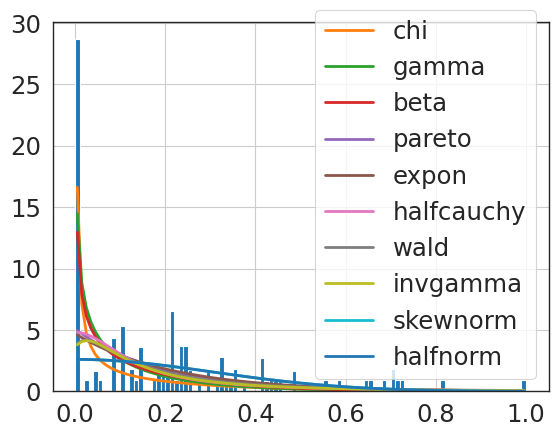

In [ ]:
# gross_rating_point_sms
f = Fitter(control_var_transformed["gross_rating_point_sms"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'chi': {'df': 0.22587529849562699,
  'loc': -1.4838104105165453e-29,
  'scale': 0.37818733588507536}}

In [ ]:
f_ = Fitter(control_var_transformed["gross_rating_point_sms"],
           distributions=["gamma"])

f_.fit()
f_.get_best()

{'gamma': {'a': 0.5947647691695899,
  'loc': -2.289227180471206e-28,
  'scale': 0.20037508876203636}}

In [ ]:
f_ = Fitter(control_var_transformed["gross_rating_point_sms"],
           distributions=["beta"])

f_.fit()
f_.get_best()

{'beta': {'a': 0.5760647016271194,
  'b': 5.840218721498243,
  'loc': -2.27479728674258e-33,
  'scale': 1.4806075608030458}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,229.955103,788.456537,804.986186,inf,0.110731,5.899684e-20
t,232.002145,773.108879,789.638528,inf,0.108891,2.603618e-19
cauchy,272.419354,662.822725,673.842491,inf,0.117453,2.099409e-22
moyal,368.709970,1730.450976,1741.470742,inf,0.221226,5.705056e-79
wald,408.768574,686.009142,697.028908,inf,0.181339,5.146600e-53
laplace,424.927256,1799.571278,1810.591044,inf,0.225002,1.050704e-81
beta,473.692429,1430.328946,1452.368479,inf,0.189804,4.443420e-58
logistic,591.084457,2293.170528,2304.190294,inf,0.225361,5.737448e-82
expon,605.753712,979.769085,990.788851,inf,0.201871,1.040521e-65
halfcauchy,646.745736,367.631187,378.650953,inf,0.205025,8.752319e-68


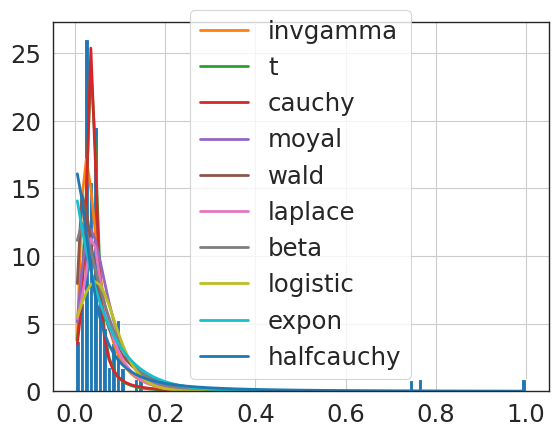

In [ ]:
# gross_rating_point_radio
f = Fitter(control_var_transformed["gross_rating_point_radio"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'invgamma': {'a': 3.4360430040716077,
  'loc': -0.013139300491652572,
  'scale': 0.16498115569364863}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,258.225092,826.375264,842.904914,inf,0.090214,2.213068e-13
moyal,263.989290,1636.782080,1647.801846,inf,0.118945,5.741091e-23
t,286.972622,841.526230,858.055880,inf,0.105092,5.160332e-18
laplace,313.266804,1901.980172,1912.999938,inf,0.160266,1.931586e-41
logistic,337.389414,2605.426826,2616.446592,inf,0.148454,1.364047e-35
beta,341.990118,1402.623670,1424.663203,inf,0.151526,4.544219e-37
cauchy,342.868552,568.798051,579.817817,inf,0.130352,1.638255e-27
wald,389.731788,595.432413,606.452179,inf,0.163041,7.000158e-43
expon,506.155397,928.471892,939.491658,inf,0.194622,4.564814e-61
skewnorm,508.381606,1938.094825,1954.624474,inf,0.340167,4.565049e-189


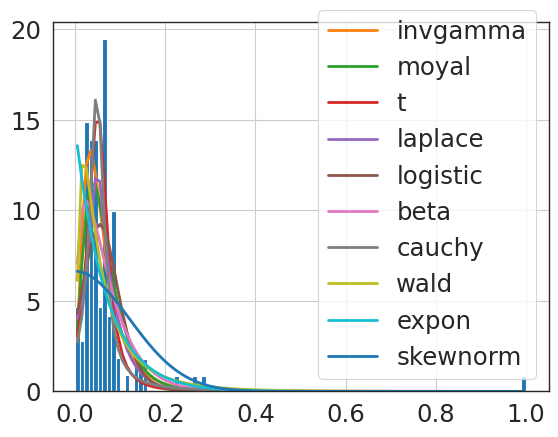

In [ ]:
# gross_rating_point_internet
f = Fitter(control_var_transformed["gross_rating_point_internet"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'invgamma': {'a': 4.639868322461375,
  'loc': -0.02482220713414067,
  'scale': 0.32411471799508496}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,59.793921,574.951034,591.480683,inf,0.065875,2.473897e-07
cauchy,75.142326,632.077694,643.097460,inf,0.179800,4.036384e-52
t,76.375214,661.883265,678.412914,inf,0.177340,1.048483e-50
wald,88.848663,736.159741,747.179507,inf,0.117526,1.972196e-22
moyal,201.330359,1503.757423,1514.777189,inf,0.193361,2.815231e-60
expon,225.895698,947.032352,958.052118,inf,0.159875,3.067006e-41
laplace,228.194297,1532.179147,1543.198913,inf,0.270086,3.866671e-118
halfcauchy,235.262887,378.038350,389.058116,inf,0.124623,3.542319e-25
beta,253.415146,928.758053,950.797585,inf,0.135707,8.615797e-30
pareto,273.792372,565.804908,582.334557,inf,0.140195,8.976269e-32


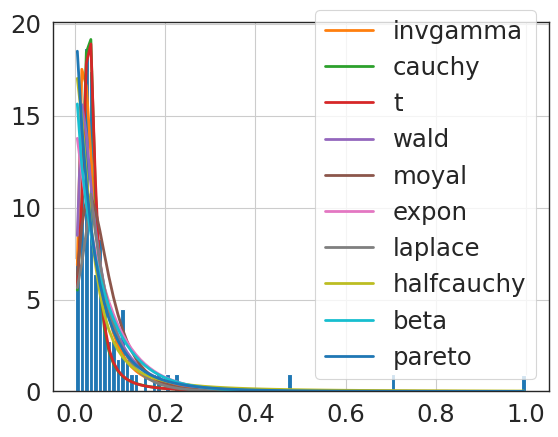

In [ ]:
# gross_rating_point_tv
f = Fitter(control_var_transformed["gross_rating_point_tv"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'invgamma': {'a': 2.165537041131259,
  'loc': -0.008189900550796058,
  'scale': 0.08325122516818015}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi,318.950569,89.084736,105.614385,0.608003,0.258322,5.930645e-108
beta,435.346230,42.769595,64.809128,0.397949,0.155404,5.603637e-39
uniform,454.489190,4.000000,15.019766,0.533351,0.263028,5.704853e-112
skewnorm,463.411059,41.920996,58.450645,0.539113,0.210972,8.696309e-72
pareto,465.709989,67.806015,84.335664,0.717675,0.230787,5.464434e-86
expon,465.709990,65.806004,76.825770,0.717675,0.230787,5.464605e-86
halfcauchy,476.401535,97.414227,108.433993,0.759572,0.252088,9.446291e-103
halfnorm,476.522680,42.961916,53.981682,0.677495,0.227429,1.730950e-83
wald,485.478831,88.450502,99.470268,0.766244,0.236968,1.082270e-90
cauchy,488.945397,142.320356,153.340122,0.704842,0.268265,1.569266e-116


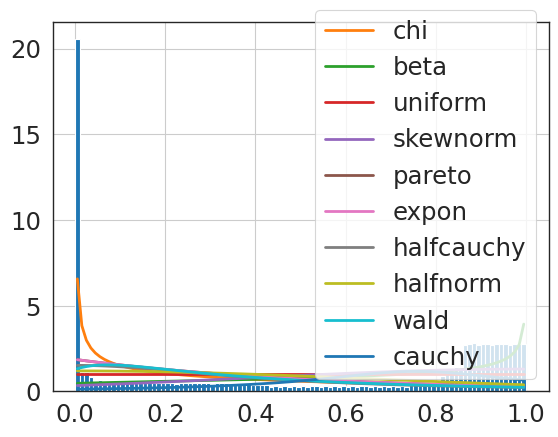

In [ ]:
# trend
f = Fitter(control_var_transformed["trend"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'chi': {'df': 0.5116229731796792,
  'loc': -1.3329411550865693e-27,
  'scale': 0.9196387900003037}}

In [ ]:
f_ = Fitter(control_var_transformed["trend"],
           distributions=["beta"])

f_.fit()
f_.get_best()

{'beta': {'a': 1.2007649986515094,
  'b': 0.6723967472778625,
  'loc': -0.17410459489981295,
  'scale': 1.1741045948998132}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi,1700.895480,219.406539,235.936188,inf,0.603723,0.000000e+00
beta,1710.362842,52.358852,74.398385,inf,0.341450,1.560649e-190
pareto,1713.610801,385.888846,402.418495,inf,0.489655,0.000000e+00
uniform,1735.618887,4.000000,15.019766,inf,0.155115,7.804784e-39
laplace,1743.917895,67.808281,78.828048,inf,0.246454,3.633579e-98
halfnorm,1749.975658,39.458403,50.478169,inf,0.256080,4.567608e-106
rice,1751.174153,37.575223,54.104873,inf,0.172792,3.823312e-48
skewnorm,1751.176071,42.856164,59.385813,inf,0.167422,3.306422e-45
t,1751.198272,42.840516,59.370166,inf,0.167747,2.210830e-45
norm,1751.198281,40.840507,51.860273,inf,0.167747,2.210525e-45


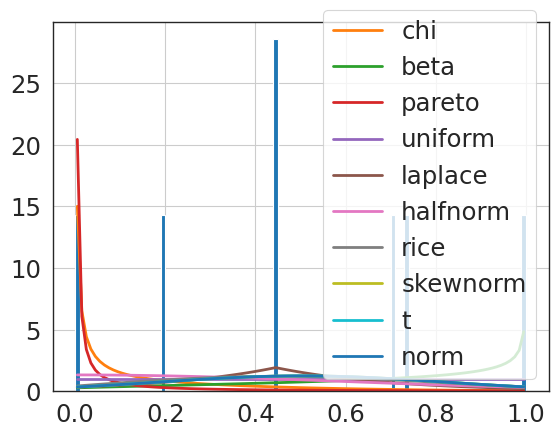

In [ ]:
# weekly
f = Fitter(control_var_transformed["weekly"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'chi': {'df': 0.24394768044760384,
  'loc': -2.487898151343366e-22,
  'scale': 0.5641873669432422}}

In [ ]:
f_ = Fitter(control_var_transformed["weekly"],
           distributions=["beta"])

f_.fit()
f_.get_best()

{'beta': {'a': 1.548383126420374,
  'b': 0.6654871450229343,
  'loc': -0.1769307330682245,
  'scale': 1.1769307330682246}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgamma,41.075640,184.024958,200.554607,inf,0.065564,2.874238e-07
lognorm,49.484479,169.717534,186.247183,inf,0.086639,2.248676e-12
wald,50.324660,155.499357,166.519123,inf,0.088948,5.084904e-13
cauchy,52.211384,310.871498,321.891264,inf,0.174299,5.511785e-49
t,52.400592,314.707650,331.237299,inf,0.172596,4.912964e-48
gamma,77.070671,149.762274,166.291923,inf,0.136895,2.612120e-30
moyal,80.126997,204.112447,215.132213,inf,0.147108,5.920035e-35
laplace,88.076334,263.065312,274.085078,inf,0.219146,1.745832e-77
halfcauchy,89.111421,165.796401,176.816167,inf,0.127368,2.779028e-26
expon,92.846994,140.360301,151.380067,inf,0.111892,2.282847e-20


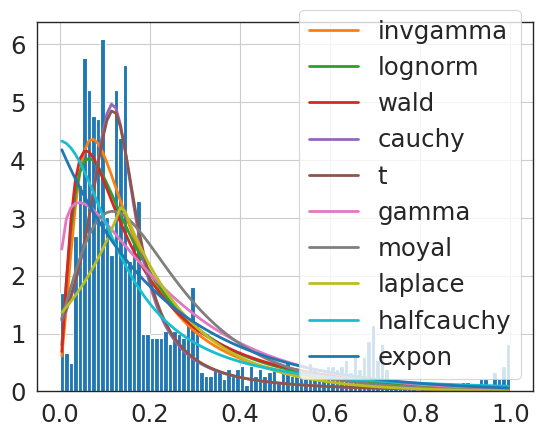

In [ ]:
# yearly
f = Fitter(control_var_transformed["yearly"],
           distributions=common_distributions)

f.fit()
f.summary(10)

In [ ]:
f.get_best()

{'invgamma': {'a': 2.249446478568849,
  'loc': -0.03889814294600396,
  'scale': 0.36145245468559883}}